# Testing different pipeline elements
This notebook contains different miscellaneous tests to ensure that the behavior of our pipeline elements is correct.

In [4]:
import json
from torch.utils.data import DataLoader
import os

import sys
sys.path.append('/Users/emiliolr/Desktop/counting-cranes')
sys.path

from bird_dataset import *
from utils import *

In [2]:
config = json.load(open('/Users/emiliolr/Desktop/counting-cranes/config.json', 'r'))
DATA_FP = config['data_filepath']
SEED = config['random_seed']

## Testing utility functions (`utils.py`)

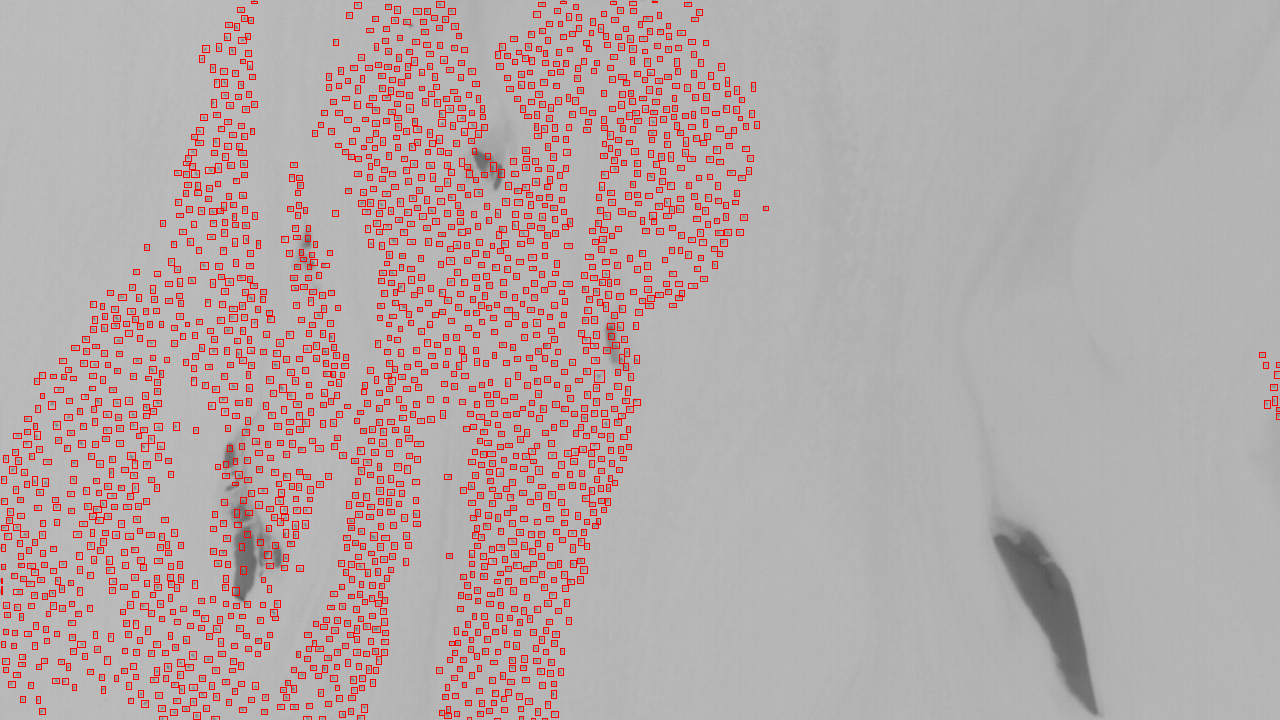

In [11]:
#Checking that bbox extraction and visualization work correctly
img_fp = os.path.join(DATA_FP, 'images/FLIR2_20210321_204704_024_4313.TIF')
annot_fp = os.path.join(DATA_FP, 'annotations/FLIR2_20210321_204704_024_4313.xml')

visualize_bboxes(img_fp, annot_fp)

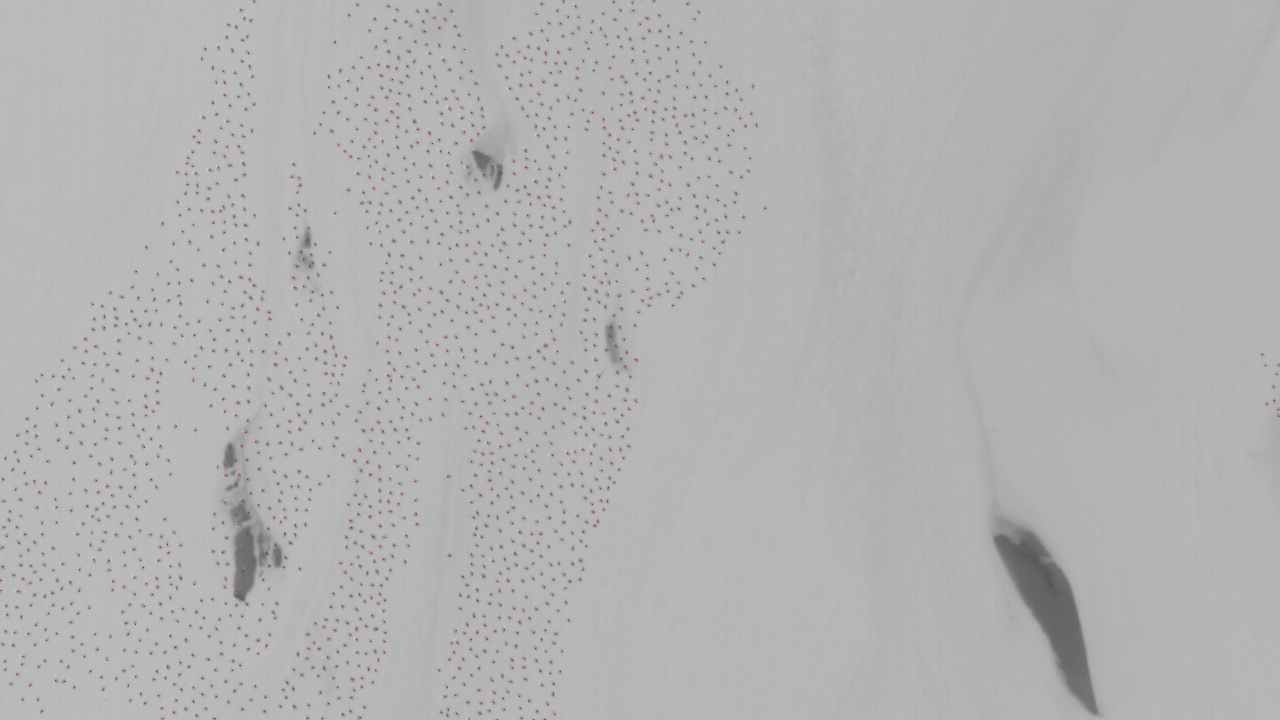

In [6]:
#Checking that point annotation translation and visualization work correctly
visualize_points(img_fp, annot_fp)

In [12]:
#Testing regression annotation type
print(f'{img_fp.split("/")[-1]} contains {get_regression(annot_fp)} birds in total')

FLIR2_20210321_204704_024_4313.TIF contains 2044 birds in total


## Testing the `BirdDataset` object

In [4]:
#Instantiating a dataset object
dataset = BirdDataset(root_dir = DATA_FP, transforms = None)

#Pulling out a particular image and its annotations
image, target = dataset[7]

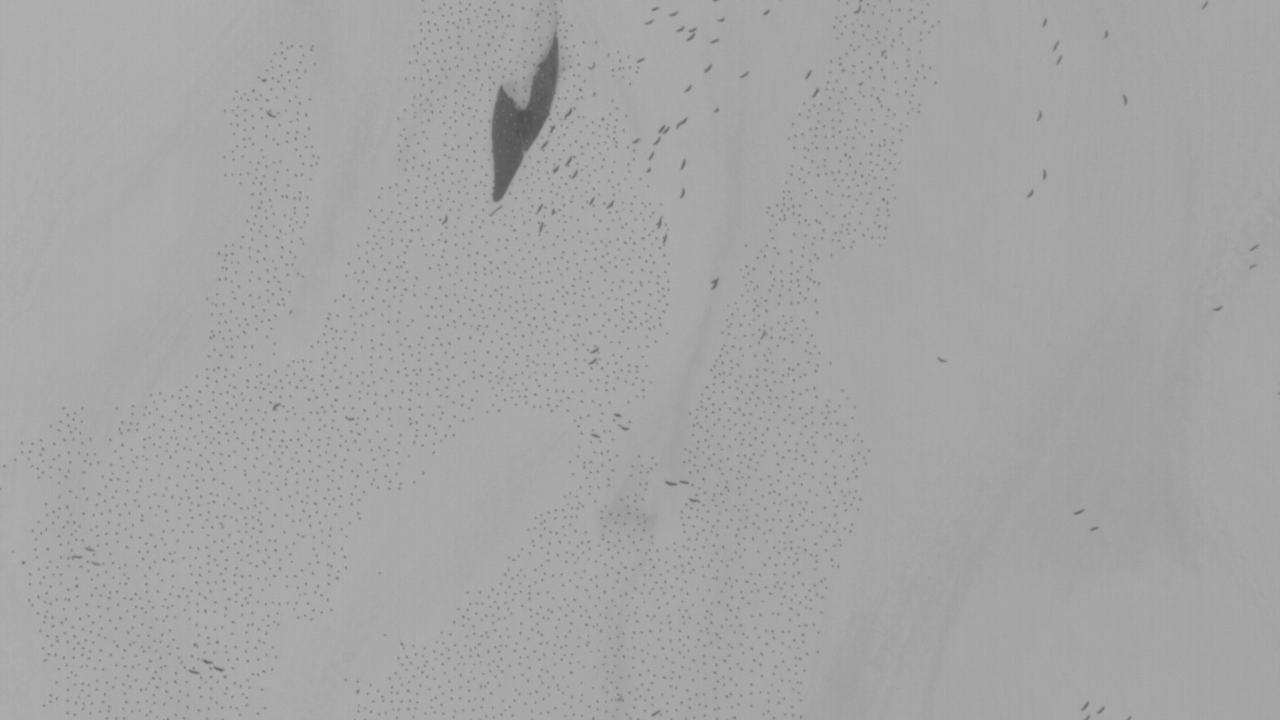

In [5]:
#Looking at the image
image

In [6]:
#Checking the shapes of target dictionary
print('Bounding box tensor shape:', target['boxes'].shape)
print('Labels tensor shape:', target['labels'].shape)

Bounding box tensor shape: torch.Size([4292, 4])
Labels tensor shape: torch.Size([4292])


In [7]:
#Checking size of dataset
len(dataset)

34

In [8]:
#Putting the dataset in a DataLoader (BEFORE tiling is implemented... behavior will chnage after tiling!)
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

#Pulling an image out of the iterator
sample_batch = next(iter(dataloader)) #TODO: come back to this once you've implemented tranforms!
sample_batch

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>